
# Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.

1 - **PatientId** : Identification of a patient

2 -**AppointmentID** : Identification of each appointment

3 - **Gender** : Male or Female  

4 - **ScheduledDay** : The day of the actuall appointment, when they have to visit the doctor.

5 - **AppointmentDay** : The day someone called or registered the appointment, this is before appointment of course.

6 - **Age** : How old is the patient.

7 - **Neighbourhood** : Where the appointment takes place.

8 - **Scholarship** : 1 of 0.
**it was a social welfare program of the Government of Brazil, financial aid to poor Brazilian families.**

9 - **Hipertension** : 1 or 0.

10 - **Diabetes** : 1 or 0.

11 - **Alcoholism** : 1 or 0.

12 - **Handcap** : 1 or 0.

13 - **SMS_received** : 1 or more messages sent to the patient.

14 - **No-show** : Yes or No.
**it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.**

### Question(s) for Analysis
- Who are the most attending and most committed to attending, males or females?
- As for the ages, who are the most attended for the appointment and Who are most eager to attend the appointment?
- What is the most attended and missed Neighborhood?
- What is the neighborhood in which the largest number of people participate in the scholarship and the most attend the appointment?
- What is the neighborhood with the most people not participating in the scholarship and the most attendance for the appointment?
- Does diabetes or hypertension or handicap affect patient attendance?
- What about a patient with diabetes, hypertension,and handicap ?
- Does drinking alcohol affect patients' attendance at the appointment?
- Does the gap between the Appointment Day and Scheduled Day increase the chance of missing the appointment?
- Does sending SMS messages remind patients to attend the appointment?

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


as shown data has no null data

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


we notice that minimum value of age is -1 and age cannot be negative 

### Data Cleaning

In [5]:
# show data with age < 0
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [6]:
# i will drop row that contain age = -1 with index 99832
df.drop(99832, inplace=True)

In [7]:
#check the data
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [8]:
# check duplicates
sum(df.duplicated())

0

In [9]:
#i do not need (patient id -appointment id )columns so i will drop them
df.drop(['PatientId','AppointmentID'], axis=1,inplace=True)
#check
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


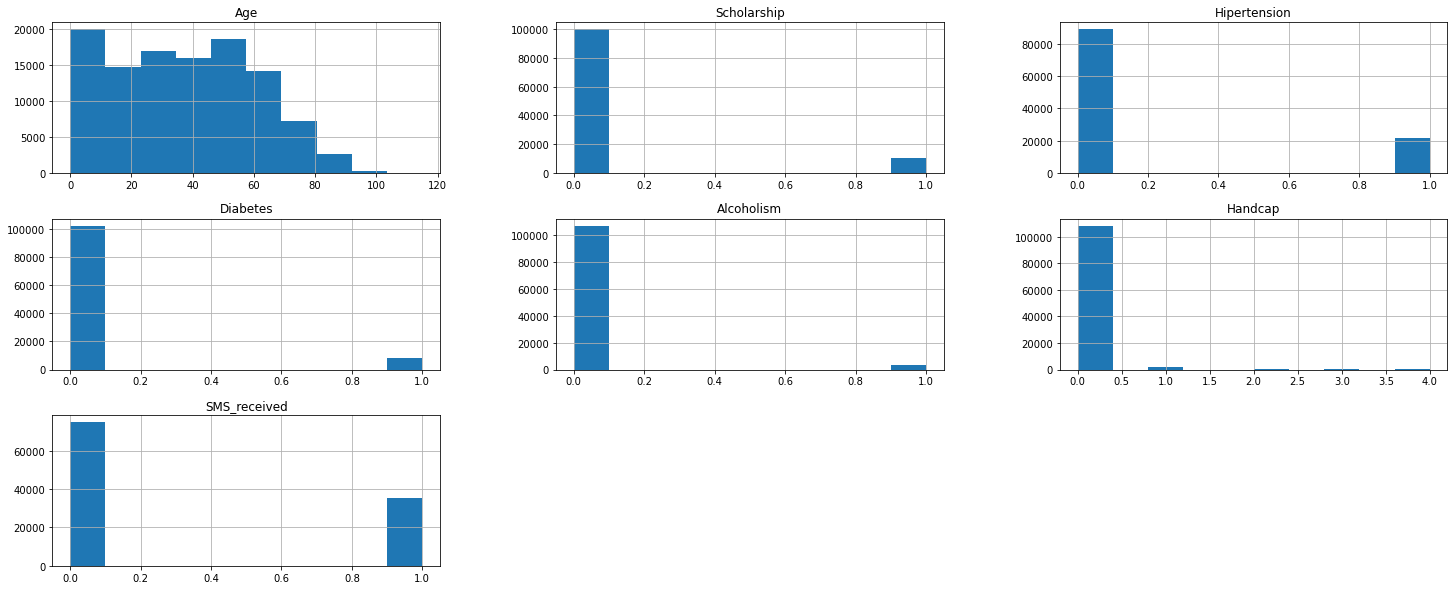

In [10]:
# I'll use the histogram to know more about the data 
df.hist(figsize=(25,10));

In [11]:
#now i will convert ScheduledDay and AppointmentDay columns to datetime datatype
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110526 non-null  object             
 1   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 3   Age             110526 non-null  int64              
 4   Neighbourhood   110526 non-null  object             
 5   Scholarship     110526 non-null  int64              
 6   Hipertension    110526 non-null  int64              
 7   Diabetes        110526 non-null  int64              
 8   Alcoholism      110526 non-null  int64              
 9   Handcap         110526 non-null  int64              
 10  SMS_received    110526 non-null  int64              
 11  No-show         110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 11.0+ MB


#### to avoid confusion i will convert the 'No-show' column name to 'Attendance' and i will replace 'No' to 'attended' and 'Yes' to 'missed'.  

In [12]:
df.rename(columns={'No-show':'Attendance'},inplace=True)
df['Attendance'].replace('No','attended',inplace=True)
df['Attendance'].replace('Yes','missed',inplace=True)


In [13]:
# check
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attendance
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,attended
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,attended
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,attended
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,attended
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,attended


i will convert age column from Continuous to Categorical to help me in visualization

resources :
[Ages](https://www.statcan.gc.ca/en/concepts/definitions/age2)

In [14]:
# 0 : 14 child
# 15 : 24 youth
# 25 : 64 adults
# 65 : 115 seniors
df['Age_Category'] = pd.cut(x = df['Age'], bins=[0, 15, 24 , 64, 115],labels=['Children', 'Youth', 'Adults','Seniors'])

In [15]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attendance,Age_Category
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,attended,Adults
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,attended,Adults
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,attended,Adults
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,attended,Children
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,attended,Adults


<a id='eda'></a>
## Exploratory Data Analysis




In [16]:
# number of patient who attended and missed the appointment 
pd.DataFrame(df['Attendance'].value_counts())


,Attendance
attended,88207
missed,22319


In [17]:
# get the percentage of missing the appointment
percentage = len(df[df['Attendance']=='missed'])/len(df) *100
print ('{} % of people missed the appointment'.format(round(percentage,2)))

20.19 % of people missed the appointment


### I will use the colors of the Brazilian flag in the visualization since the data is from Brazil
![](brazil-flag-colors-by-schemecolor.png)
resource : [Brazil Flag Colors](https://www.schemecolor.com/brazil-flag-colors.php#download)

### Research Question 1 (Who are the most attending and most committed to attending, males or females?)


In [18]:
def perc_of_attend(data,column):
    """
    This function does three things :
    
      1- Returns Figure 1 visualize the percentage of  each value  in column  in the entire data set.
      2 Returns Figure 2 visualize the percentage of each value  in column  who attended the appointment
      3- Figure 3 visualize the percentage of attendance in column values according to their counts in dataset
    
    input : 
    
      data : dataframe we use 
      column :column wich we work in it 
    
    output :
      1)fig 1 pie char 
      2)fig 2 bar plot 
      3)fig 3 bar plot
      
    """
    #for fig 1
    #choose a random colors from the 4 colors
    colo_r =random.choice([['#009c3b','#ffdf00','#002776','#ffffff'],['#002776','#ffffff','#009c3b','#ffdf00']])
    #get value counts in the column to visualize it in pie char with percentage of each value using 'autopct' and blue border
    data[column].value_counts().plot.pie(autopct='%1.1f%%',colors=colo_r, wedgeprops = {"edgecolor":'#002776','linewidth': 4})
    plt.title('precentage of {} values in the whole data set ( Fig 1)'.format(column))
    plt.show()
    
    #for fig 2
    #i will filter the data .
    #get the count of patient attended and missed the appointment
    data.groupby(column).Attendance.value_counts().unstack().plot(kind='bar',color=colo_r,edgecolor='#009c3b',linewidth=2)
    plt.title('count of {} values in attendance and missing the appointment ( Fig 2)'.format(column))
    plt.show()
              
    #for fig 3 
    #i will  calculate the percentage of attendece in each values of column and plotting it.
    filter_data=data.query("Attendance=='attended'")
    perc = filter_data.groupby(column).Attendance.count()/data.groupby(column).Attendance.count()*100
    perc.plot(kind='bar',figsize=(10,5),color=colo_r,edgecolor='#009c3b',linewidth=2)
    plt.title('The percentage of attendance in {} values according to their counts ( Fig 3)'.format(column))
    plt.show()

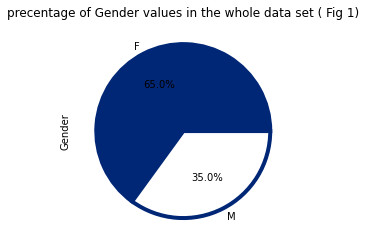

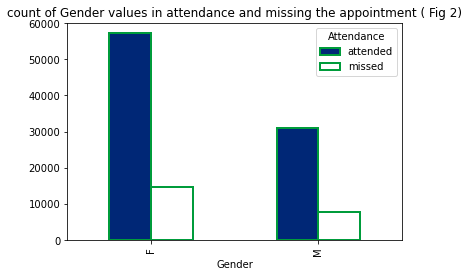

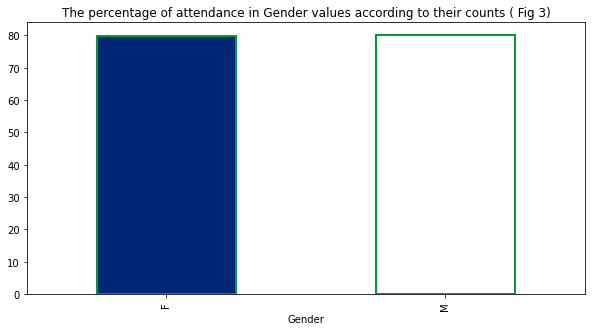

In [19]:
perc_of_attend(df,'Gender');

- As shown in **Fig 1**, there are more females than males in the whole dataset

- in **Fig 2** females are the most attending and missing

- in **Fig 3** Males and females are equal in their eagerness to attend the appointment

### Research Question 2 (As for the ages, who are the most attended for the appointment and Who are most eager to attend the appointment?)


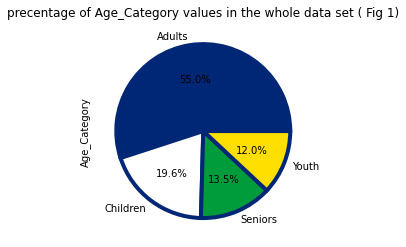

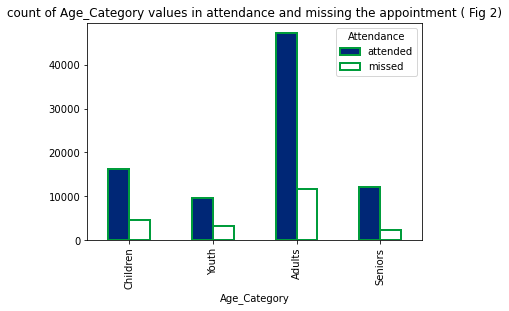

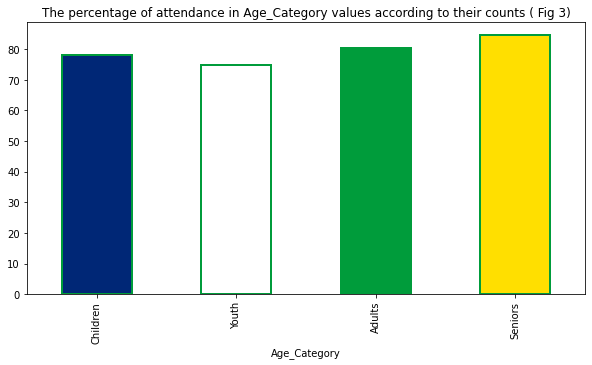

In [20]:
perc_of_attend(df,'Age_Category');

- As shown in **fig 1** Adults are the most numerous.

- **fig 2** , as shown adults group is the most group attended and missing the appointment.

- in **fig 3**  We see that the seniors are the most eager to attend the appointment.

### Research Question 3  (What is the most attended and missed Neighborhood?)

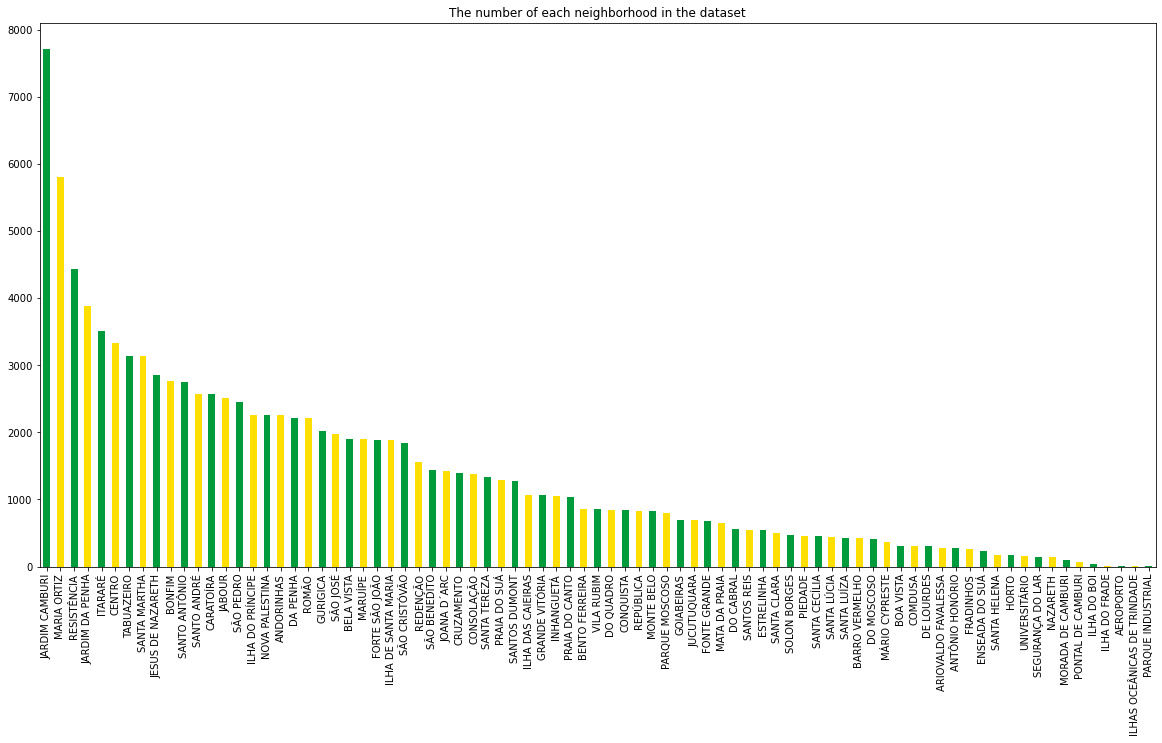

In [21]:
# i will count the different values of the column and plot it in bar chart
df['Neighbourhood'].value_counts().plot(kind='bar',color=['#009c3b','#ffdf00'],figsize=(20,10))
plt.title("The number of each neighborhood in the dataset");


 as shown **Jardim Camburi** is the most popular

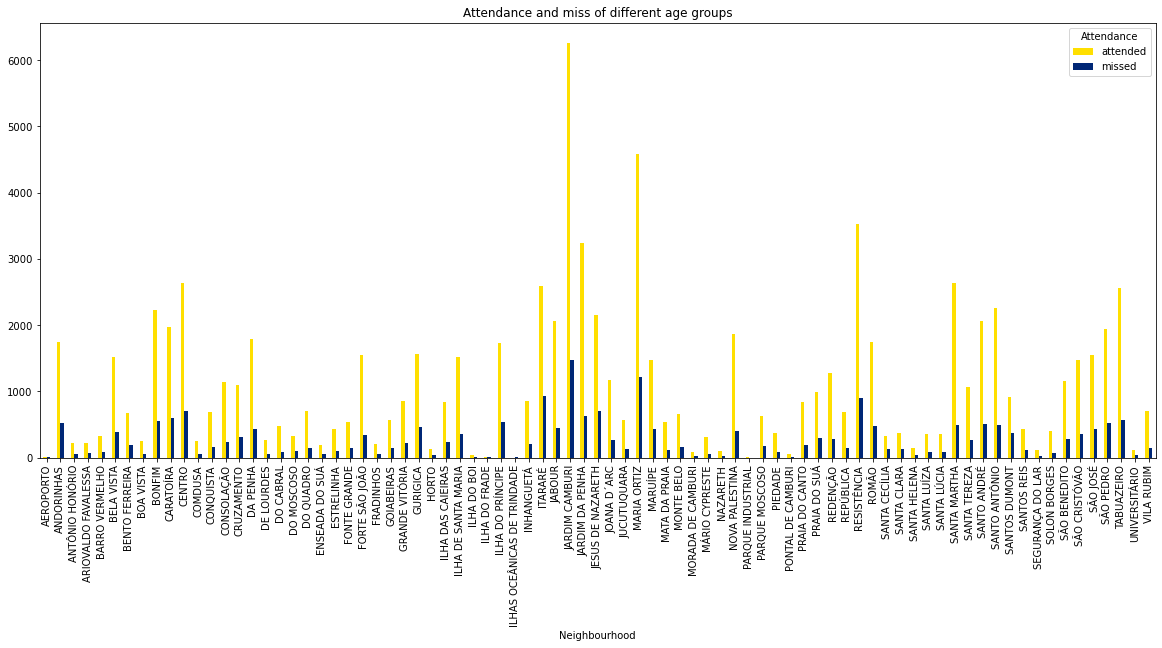

In [22]:
# now lets answer the question with visualization
# i will use groupby to link between different columns'Attendance' and 'Neighbourhood'
df.groupby('Attendance').Neighbourhood.value_counts().unstack(0).plot(kind='bar',color=['#ffdf00','#002776'],figsize=(20,8))
plt.title('Attendance and miss of different age groups');

**Jardim Camburi** is the neighborhood in which patients attend the medical appointment the most and is also the most miss

### Research Question 4  (What is the neighborhood in which the largest number of people participate in the scholarship and the most attend the appointment?)

In [23]:
"""i will filter the data by scholarship is equal 1 and then get count of each value and sort it
     i make sort=True and 
     ascending = false because the default = True so i will get the max number in the first line 
     and i use iloc to print this line only
""" 

pd.DataFrame(df[df['Scholarship']==1].Neighbourhood.value_counts(sort=True , ascending=False).iloc[:1])


,Neighbourhood
ILHA DO PRÍNCIPE,579


 neighborhood in which the largest number of people participate in the scholarship is **"ILHA DO PRÍNCIPE "  by count = 579**

In [24]:
def filter_3_groups(data,column1,val,column2,column3):
    """
    this function return value of groupby 3 columns
    
    input:
    data : dataframe we will use
    column1: first column which i will filter with the values in it 
    val : the value that you will filter the data using it (ex: i want column 'scholarship' when it's 1
    column 2 and  column3
    
    output 
    count of each value of the 3 columns dependent on filteration conditions
    """
    filtered = data.query("{} == {}".format(column1,val))
    return  filtered.groupby([column1,column2])[column3].value_counts(sort=True , ascending=False)

In [25]:
pd.DataFrame(filter_3_groups(df.query("Attendance == 'attended'"),'Scholarship',1,'Attendance','Neighbourhood').iloc[:1])

,,,Neighbourhood
Scholarship,Attendance,Neighbourhood,
1,attended,ILHA DO PRÍNCIPE,438


neighborhood in which people participate in the scholarship and the most attended the appointment is **"ILHA DO PRÍNCIPE" by count = 438**

### Research Question 5  (What is the neighborhood with the most people not participating in the scholarship and the most attendance for the appointment?)

In [26]:
pd.DataFrame(filter_3_groups(df.query("Attendance == 'attended'"),'Scholarship',0,'Attendance','Neighbourhood').iloc[:1])

,,,Neighbourhood
Scholarship,Attendance,Neighbourhood,
0,attended,JARDIM CAMBURI,6136


neighborhood with the most people not participating in the scholarship and the most attendance is **"JARDIM CAMBURI	" by count = 6136**

### Research Question 6 (Does diabetes or hypertension  or handicap affect patient attendance?)

In [27]:
def attend_Diseas_plot(data,column):
    """
    This function return the number of patients who have specific disease 
    when they attended and missed the appointment and plot this informations in pie chart
    
    input :
    data : datframe i will use
    column:column i will use to analysis
    
    output: 
    pie plot explain the percentage of people with this disease who attended 
    and people without disease who missed the appointment 
    
    """
    df[(df[column]>=1)].Attendance.value_counts().plot.pie(autopct='%1.1f%%'
                                                           ,colors= random.choice([['#009c3b','#ffdf00'],['#002776','#ffffff']])
                                                           ,wedgeprops = {"edgecolor":'black','linewidth': 4})
    plt.title('Number of people with {} who attended and were missed'.format(column))
    plt.show()

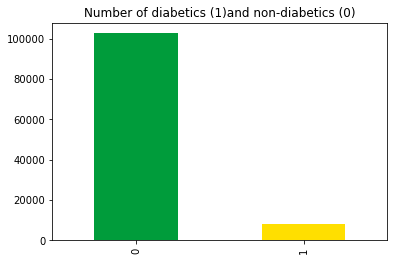

In [28]:
# plot Number of diabetics and non-diabetics
df['Diabetes'].value_counts().plot(kind='bar',color= ['#009c3b','#ffdf00'])
plt.title("Number of diabetics (1)and non-diabetics (0)");

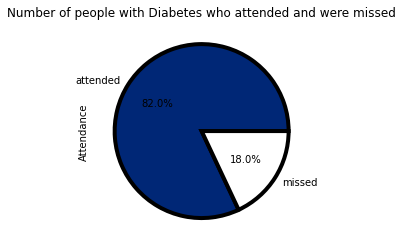

In [29]:
attend_Diseas_plot(df,'Diabetes');

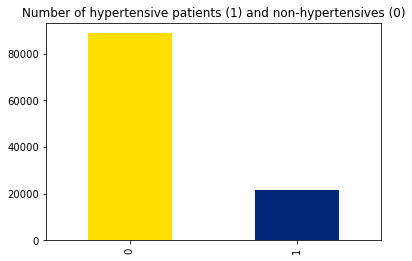

In [30]:
# plot Number of hypertensive patients and non-hypertensives
df['Hipertension'].value_counts().plot(kind='bar',color= ['#ffdf00','#002776'])
plt.title("Number of hypertensive patients (1) and non-hypertensives (0)");

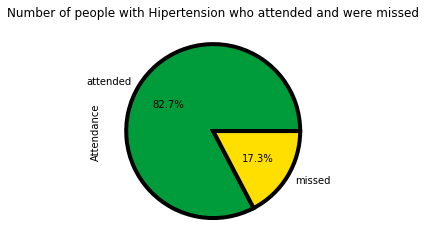

In [31]:
attend_Diseas_plot(df,'Hipertension');

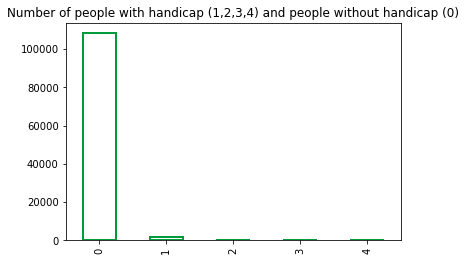

In [32]:
# plot Number of people with handicap and people without handicap
df['Handcap'].value_counts().plot(kind='bar',color='#ffffff',edgecolor='#009c3b',linewidth=2)
plt.title("Number of people with handicap (1,2,3,4) and people without handicap (0)");

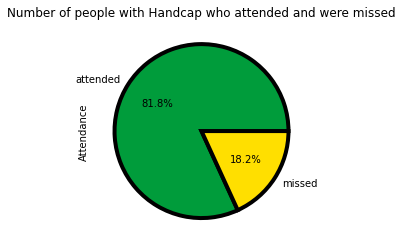

In [33]:
attend_Diseas_plot(df,'Handcap');

  As shown, **diabetes**, **hypertension**, and **handcap** do not affect patients' attendance at the appointment

### Research Question 6 (What about a patient with diabetes, hypertension,and handicap ?)

In [34]:
filtering = df.query("Diabetes == 1")
filtering = filtering[filtering['Handcap']>=1]
filtering = filtering.query("Hipertension == 1")
# check
filtering.head()


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attendance,Age_Category
199,M,2016-04-29 09:54:38+00:00,2016-04-29 00:00:00+00:00,62,PARQUE MOSCOSO,0,1,1,0,1,0,attended,Adults
238,F,2016-04-26 13:06:57+00:00,2016-04-29 00:00:00+00:00,65,ARIOVALDO FAVALESSA,0,1,1,0,1,1,attended,Seniors
518,M,2016-04-29 11:46:28+00:00,2016-04-29 00:00:00+00:00,79,BONFIM,0,1,1,0,1,0,attended,Seniors
661,M,2016-04-29 13:27:49+00:00,2016-04-29 00:00:00+00:00,59,SANTO ANDRÉ,0,1,1,0,1,0,attended,Adults
935,M,2016-03-16 16:06:13+00:00,2016-04-29 00:00:00+00:00,69,GRANDE VITÓRIA,0,1,1,0,1,1,attended,Seniors


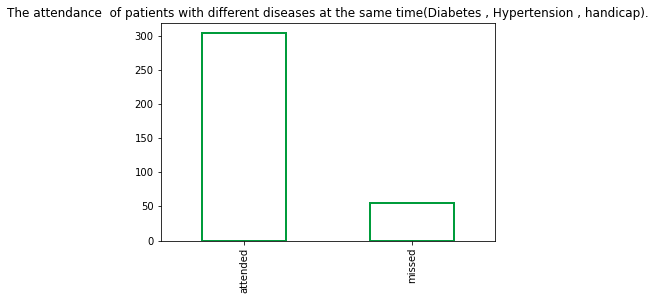

In [35]:
filtering['Attendance'].value_counts().plot(kind='bar',color='#ffffff',edgecolor='#009c3b',linewidth=2)
plt.title('The attendance  of patients with different diseases at the same time(Diabetes , Hypertension , handicap).');

As shown the gathering of these diseases in one person **does not affect** his attendance at the appointment

### Research Question 7 (Does drinking alcohol affect patients' attendance at the appointment?)

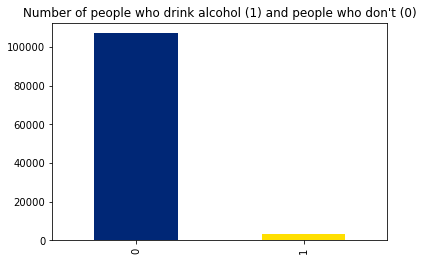

In [36]:
# Number of people who drink alcohol and people who don't
df['Alcoholism'].value_counts().plot(kind='bar',color= ['#002776','#ffdf00'])
plt.title("Number of people who drink alcohol (1) and people who don't (0)");

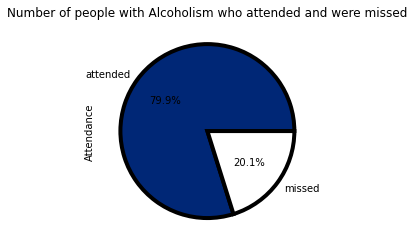

In [37]:
attend_Diseas_plot(df,'Alcoholism');

As shown,  drinking **alcohol** do not affect patients' attendance at the appointment

### Research Question 8 (Does the gap between the Appointment Day and Scheduled Day increase the chance of missing the appointment?)

In [38]:
""" 
    i will add a new column called gap ,the values in this column will be 
    the difference between appointment day(The day someone called or registered the appointment,
    this is before appointment of course) 
    and 
    scheduled day(The day of the actuall appointment, when they have to visit the doctor.)
"""



df['gap'] = (df['AppointmentDay'].dt.date -df['ScheduledDay'].dt.date ).dt.days
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attendance,Age_Category,gap
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,attended,Adults,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,attended,Adults,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,attended,Adults,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,attended,Children,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,attended,Adults,0


i will want to know how many people attended in each gap value 'values is a gap by number of days' and i will make a dataframe from the output to use it
 resource : [convert count output to dataframe](https://stackoverflow.com/questions/47136436/python-pandas-convert-value-counts-output-to-dataframe)

In [39]:
# i will filter data to get only attended patients  
filtering_attend = df.query("Attendance == 'attended'")

# i want to know the count of attended patients in each gap day
gap_attended = filtering_attend.groupby('gap').Attendance.count()

#convert output of count to data frame 
gap_attended = gap_attended.rename_axis('gap_days').reset_index(name='count_of_attend')
gap_attended

,gap_days,count_of_attend
0,0,36770
1,1,4100
2,2,5123
3,3,2093
4,4,4059
...,...,...
119,155,4
120,162,9
121,169,7
122,176,10


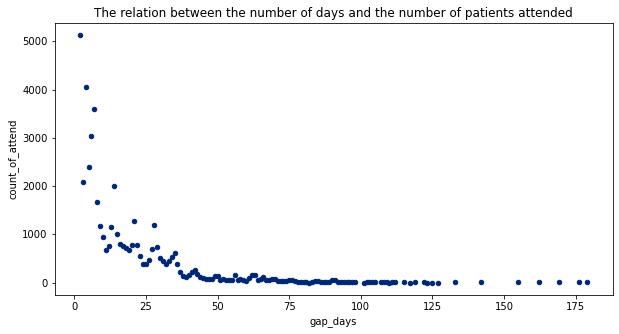

In [40]:
# visualize the reslts as a scatter plot
gap_attended.query("gap_days > 1").plot.scatter(x='gap_days',y='count_of_attend',c='#002776',figsize=(10,5))
plt.title("The relation between the number of days and the number of patients attended");

##### as shown when the number of days increase the count of  attended people decrease

### Research Question 9 (Does sending SMS messages remind patients to attend the appointment?)

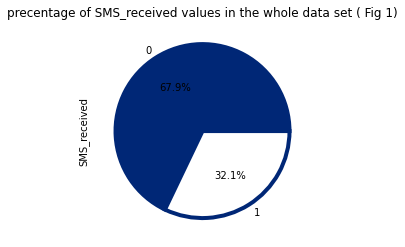

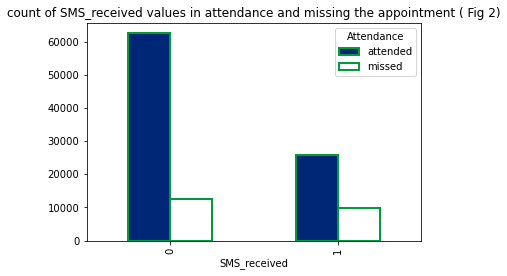

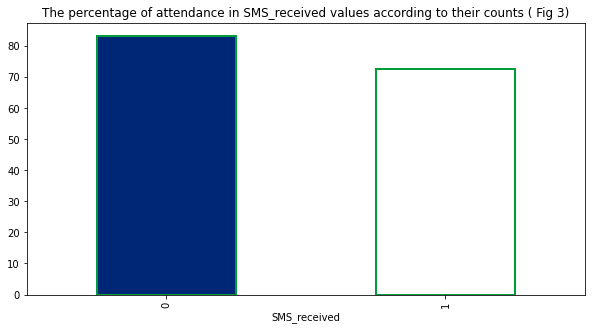

In [41]:
perc_of_attend(df,'SMS_received');

##### As shown, sending SMS does not affect the attendance of patients

<a id='conclusions'></a>
## Conclusions
-  88207  patient attended the appointment and  22319  patient missed the appointment (20.19 % of people missed the appointment)
-  percentage of females in data set is 65 % but males 35 %
-  Males and females are equal in their eagerness to attend the appointment
-  seniors are the most eager to attend the appointment
-  Jardim Camburi is the neighborhood in which patients attend the medical appointment the most and is also the most miss
-  neighborhood in which people participate in the scholarship and the most attended the appointment is "ILHA DO PRÍNCIPE" by count = 438
-  diabetes, hypertension, and handcap do not affect patients' attendance at the appointment
-  drinking alcohol do not affect patients' attendance at the appointment
-  The number of patients attending the appointment decreases when the gap between the booking date and the examination date increasing
- sending SMS does not affect the attendance of patients

#### Limitation 
- The no_show column may cause confusion because the values inside it are reversed with the negation in the column name
- Some names of diseases are not written correctly and some column names, I think, do not explain what is inside the column